# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

   sumber dataset https://www.kaggle.com/code/thedataman123/ai-data-jobs-usa-ml


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
from google.colab import drive
drive.mount('/content/drive')

# Memuat dataset dari Google Drive
file_path = "/content/drive/MyDrive/Road Traffic Accident Data – United Kingdom/jobs_dataset.csv"
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
df.head()

Mounted at /content/drive


,company,rating,location,positionName,description,salary,url,jobType/0,jobType/1,jobType/2,jobType/3,searchInput/country,searchInput/position,externalApplyLink
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,"$166,000 - $244,000 a year",https://www.indeed.com/viewjob?jk=3129ec5dde24...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.google.com/about/careers/applicati...
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,"$112,000 - $154,000 a year",https://www.indeed.com/viewjob?jk=19da1b85455c...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://jobs.baxter.com/en/job/-/-/152/8298788...
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",$70.67 an hour,https://www.indeed.com/viewjob?jk=0b0b432e2a51...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/3101204833367...
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...","$203,350 - $240,240 a year",https://www.indeed.com/viewjob?jk=08d2ef77c976...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/1096352489054...
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",NaN,https://www.indeed.com/viewjob?jk=e9aad7dcc34e...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://click.appcast.io/t/V35efAz0-l7FWwo6IKe...


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               735 non-null    object 
 1   rating                735 non-null    float64
 2   location              735 non-null    object 
 3   positionName          735 non-null    object 
 4   description           735 non-null    object 
 5   salary                506 non-null    object 
 6   url                   735 non-null    object 
 7   jobType/0             501 non-null    object 
 8   jobType/1             19 non-null     object 
 9   jobType/2             1 non-null      object 
 10  jobType/3             1 non-null      object 
 11  searchInput/country   735 non-null    object 
 12  searchInput/position  735 non-null    object 
 13  externalApplyLink     553 non-null    object 
dtypes: float64(1), object(13)
memory usage: 80.5+ KB


In [4]:
df.describe(include='object')

,company,location,positionName,description,salary,url,jobType/0,jobType/1,jobType/2,jobType/3,searchInput/country,searchInput/position,externalApplyLink
count,735,735,735,735,506,735,501,19,1,1,735,735,553
unique,427,321,550,711,385,735,6,4,1,1,1,1,549
top,Amazon,"New York, NY",Data Scientist,"We're Celonis, the global leader in Process Mi...","$206,000 - $281,000 a year",https://www.indeed.com/viewjob?jk=e587a3d57c2e...,Full-time,Contract,Full-time,Contract,US,Data Scientist,https://www.google.com/about/careers/applicati...
freq,24,62,45,2,6,1,439,13,1,1,735,735,2


In [5]:
df.isna().sum()

,0
company,0
rating,0
location,0
positionName,0
description,0
salary,229
url,0
jobType/0,234
jobType/1,716
jobType/2,734


In [6]:
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")


Jumlah baris duplikat: 0


In [7]:
df.dtypes


,0
company,object
rating,float64
location,object
positionName,object
description,object
salary,object
url,object
jobType/0,object
jobType/1,object
jobType/2,object


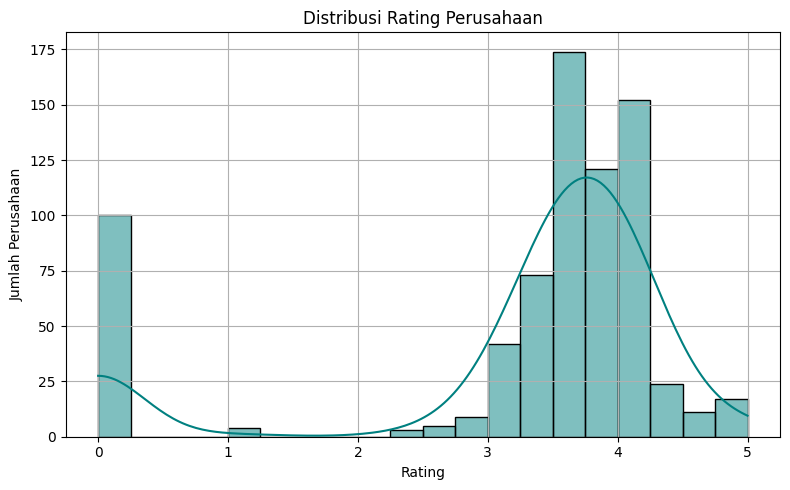

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['rating'].dropna(), bins=20, kde=True, color='teal')
plt.title("Distribusi Rating Perusahaan")
plt.xlabel("Rating")
plt.ylabel("Jumlah Perusahaan")
plt.grid(True)
plt.tight_layout()
plt.show()

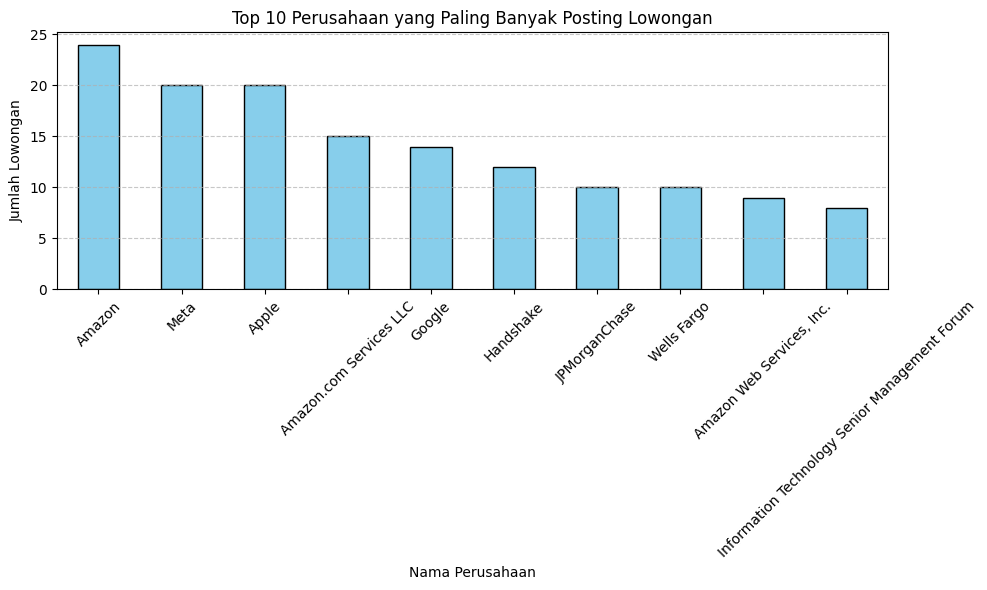

In [9]:
top_companies = df['company'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_companies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Perusahaan yang Paling Banyak Posting Lowongan')
plt.xlabel('Nama Perusahaan')
plt.ylabel('Jumlah Lowongan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
# kolom salary_num & panjang teks

def extract_salary(s):
    try:
        numbers = re.findall(r'[\d,]+', str(s))
        if len(numbers) >= 1:
            return int(numbers[0].replace(',', ''))
    except:
        return None
    return None
df['salary_num'] = df['salary'].apply(extract_salary)
df['desc_len'] = df['description'].astype(str).apply(len)
df['posname_len'] = df['positionName'].astype(str).apply(len)


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

##mising value


In [11]:
df = df.dropna(subset=['salary'])  # kolom target harus ada
job_cols = ['jobType/0', 'jobType/1', 'jobType/2', 'jobType/3']
df[job_cols] = df[job_cols].fillna(False)
df['externalApplyLink'] = df['externalApplyLink'].fillna('Unavailable')


/tmp/ipython-input-11-2097358818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[job_cols] = df[job_cols].fillna(False)
/tmp/ipython-input-11-2097358818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['externalApplyLink'] = df['externalApplyLink'].fillna('Unavailable')


##duplikat


In [12]:
df = df.drop_duplicates(subset=['company', 'positionName', 'location', 'salary', 'description'])


##binning

In [13]:
bins_salary = [0, 70000, 120000, 200000, df['salary_num'].max()]
labels_salary = ['Low', 'Medium', 'High', 'Very High']
df['salary_bin'] = pd.cut(df['salary_num'], bins=bins_salary, labels=labels_salary)

bins_rating = [0, 2, 3.5, 4.5, 5]
labels_rating = ['Poor', 'Average', 'Good', 'Excellent']
df['rating_bin'] = pd.cut(df['rating'], bins=bins_rating, labels=labels_rating)

df = df[df['rating_bin'].isin(['Good', 'Excellent'])].copy()
df = df.dropna(subset=['salary_bin'])  # pastikan target tidak null


##split data

In [14]:
from sklearn.model_selection import train_test_split

y = df['salary_bin']
X = df.drop(columns=['salary_bin'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


##Normalisasi atau Standarisasi Fitur

In [15]:
cols_to_scale = ['rating', 'salary_num', 'desc_len', 'posname_len']
scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


##penanganan outlier

In [16]:
z_scores = X_train[cols_to_scale].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print("Jumlah outlier pada train set:", outliers.sum())

for col in cols_to_scale:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    X_train[col] = X_train[col].clip(lower, upper)


Jumlah outlier pada train set: 11


##Encoding Data Kategorikal

In [17]:
cols_to_encode = [
    'company',
    'location',
    'positionName',
    'jobType/0',
    'jobType/1',
    'jobType/2',
    'jobType/3',
    'searchInput/country',
    'searchInput/position'
]

X_train = pd.get_dummies(X_train, columns=cols_to_encode, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cols_to_encode, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [18]:
# Simpan hasil preprocessing manual dari notebook ke CSV
output_path = "/content/drive/MyDrive/Road Traffic Accident Data – United Kingdom/data_preprocessed_manual.csv"
Xy_train = X_train.copy()
Xy_train['salary_bin'] = y_train  # gabungkan kembali target

Xy_train.to_csv(output_path, index=False)
print("✅ Data hasil preprocessing disimpan ke:", output_path)


✅ Data hasil preprocessing disimpan ke: /content/drive/MyDrive/Road Traffic Accident Data – United Kingdom/data_preprocessed_manual.csv
